# Brest Cancer Prediciton

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

### 1. Importation des données

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Forme 
df.shape

(569, 31)

In [5]:
# Informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
# Valeurs manquantes 
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### 2. Analyse exploratoire 

In [7]:
# Statistique descriptives 
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: xlabel='target', ylabel='Density'>

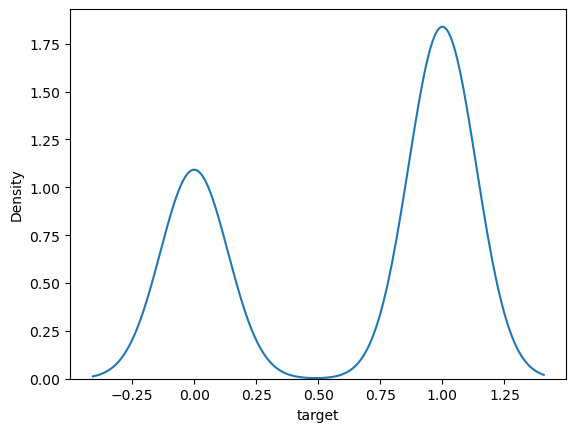

In [8]:
# Distribution de la variable cible 
sns.kdeplot(df['target'])

In [9]:
# Identifications des corrélations
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: xlabel='concave points error', ylabel='Count'>

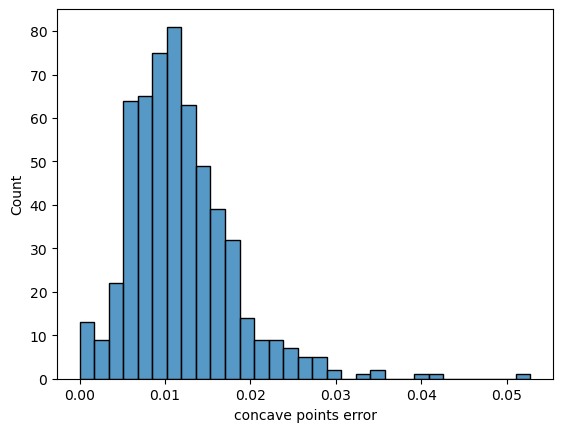

In [10]:
# Histogramme de quelques variables 
sns.histplot(df['concave points error'])

<Axes: xlabel='symmetry error', ylabel='Count'>

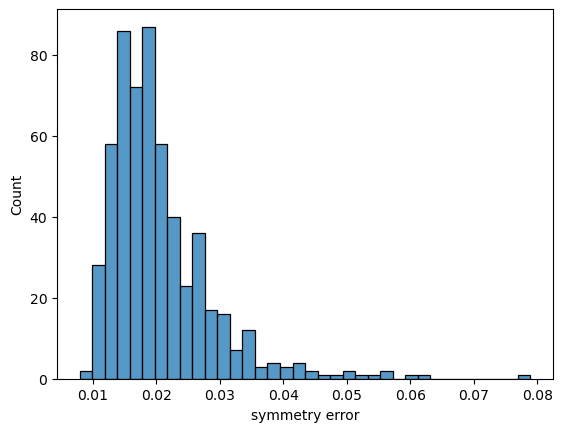

In [11]:
sns.histplot(df['symmetry error'])

<Axes: xlabel='compactness error', ylabel='Count'>

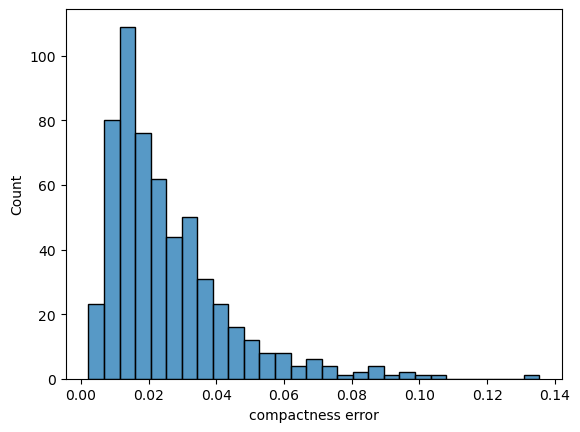

In [12]:
sns.histplot(df['compactness error'])

<Axes: xlabel='fractal dimension error', ylabel='Count'>

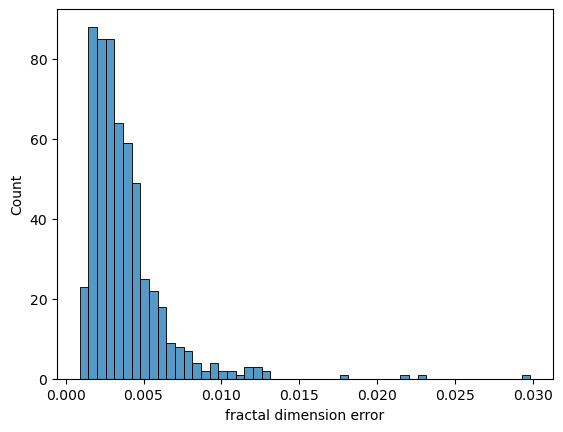

In [13]:
sns.histplot(df['fractal dimension error'])

<Axes: xlabel='perimeter error', ylabel='Count'>

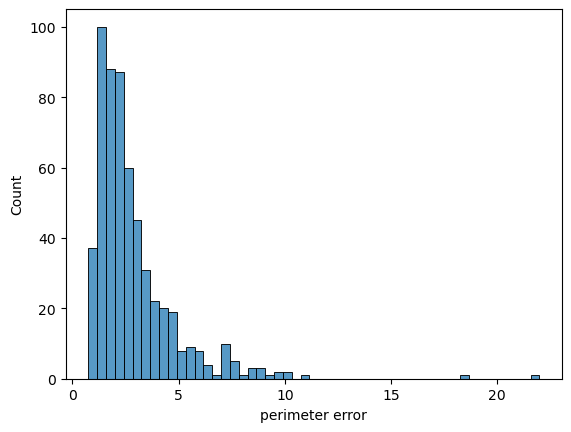

In [14]:
sns.histplot(df['perimeter error'])

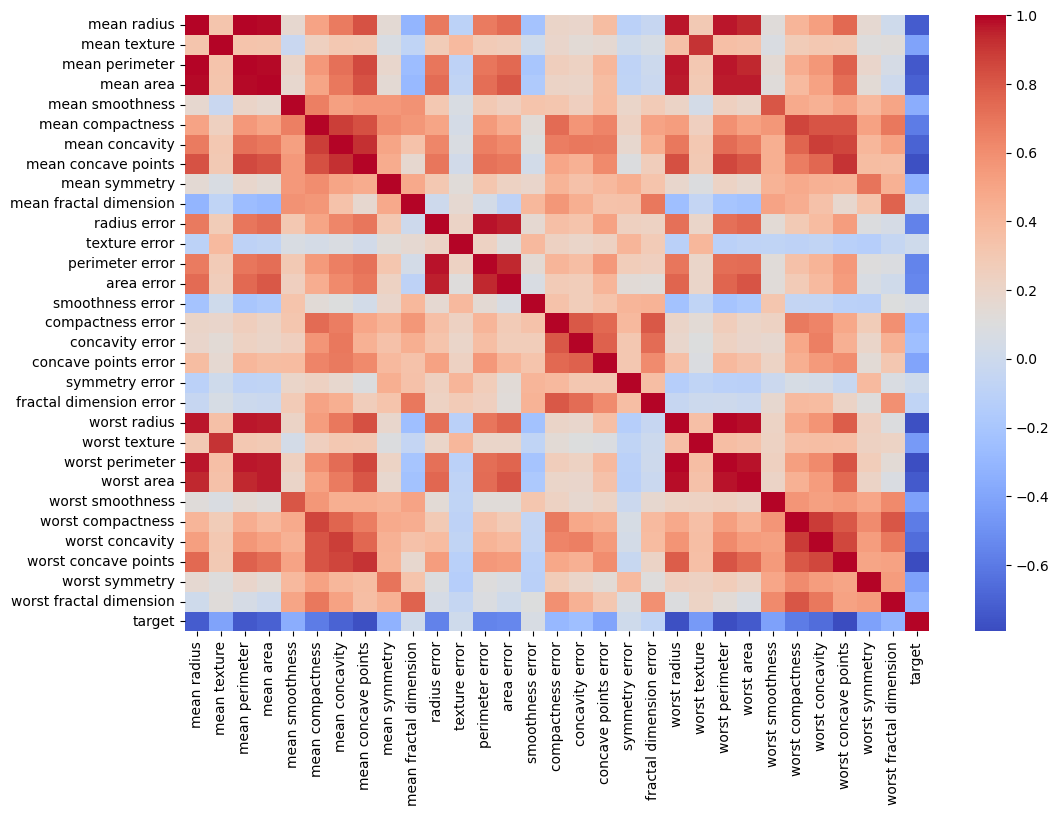

In [15]:
# AFficher la matrice de corrélations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.savefig('heatmap breast cancer.png')

### 3. Preprocessing 

In [18]:
# Normalisation des variables et création de la pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
logistic_regression = LogisticRegression(max_iter=1000)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])
pipe_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.SVC(kernel='linear', gamma='scale'))
])

In [19]:
# Séparer les données 
from sklearn import svm
from sklearn.model_selection import train_test_split
x = df.drop(['target'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 4. Modélisation

In [20]:
# Entraîner le modèle 
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=1000))])

In [21]:
pipe_2.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

**Avant de l'évaluer sur les données de test, j'aimerais le faire sur les données d'entraînement et voir son score**

In [22]:
pipe.score(x_train, y_train)

0.9868131868131869

In [23]:
pipe_2.score(x_train, y_train)

0.9868131868131869

**On peut rechercher les meilleures hyperparamètres pour notre modèle**

In [24]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv= StratifiedKFold(n_splits=5)
param_grid = {
    'logistic__max_iter' : [500, 1000, 2000],
    'logistic__C' : [0.01, 0.1, 1, 10, 100, 500, 1000]
}
param_2 = {
    'svm__kernel' : ['linear', 'rbf', 'poly'],
    'svm__C' : np.linspace(0.1, 100, 200)
}
model = GridSearchCV(pipe, param_grid, cv=cv)
model_2 = GridSearchCV(pipe_2, param_2, cv=cv)

In [25]:
model.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                         'logistic__max_iter': [500, 1000, 2000]})

In [26]:
# Meilleures paramètres pour notre modèle 
model.best_params_

{'logistic__C': 1, 'logistic__max_iter': 500}

In [27]:
model_2.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'svm__C': array([  0.1       ,   0.60201005,   1.1040201 ,   1.60603015,
         2.1080402 ,   2.61005025,   3.1120603 ,   3.61407035,
         4.1160804 ,   4.61809045,   5.1201005 ,   5.62211055,
         6.1241206 ,   6.62613065,   7.1281407 ,   7.63015075...
        86.44572864,  86.94773869,  87.44974874,  87.95175879,
        88.45376884,  88.95577889,  89.45778894,  89.95979899,
        90.46180905,  90.9638191 ,  91.46582915,  91.9678392 ,
        92.46984925,  92.9718593 ,  93.47386935,  93.9758794 ,
        94.47788945,  94.9798995 ,  95.48190955,  95.9839196 ,
        96.48592965,  96.9879397 ,  97.48994975,  97.9919598 ,
        98.49396985,  98.9959799 ,  99.49798995, 100.        ]),
                         'svm__kernel': ['linear', 'rbf', 'poly']})

In [28]:
model_2.best_params_

{'svm__C': np.float64(1.606030150753769), 'svm__kernel': 'rbf'}

### Nous avons le modèle avec les meilleures hyperparamètres alors passons à l'évaluation

### 5. Evaluation du modèle

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(x_test)
print(f"Precision : {round(precision_score(y_test, y_pred),2)}")
print(f"Accuracy : {round(accuracy_score(y_test, y_pred), 2)}")
print(f"recall_score : {round(recall_score(y_test, y_pred), 2)}")
print(f"f1_score : {round(f1_score(y_test, y_pred), 2)}")

Precision : 0.97
Accuracy : 0.97
recall_score : 0.99
f1_score : 0.98


In [30]:
y_pred_2 = model_2.predict(x_test)
print(f"Precision : {round(precision_score(y_test, y_pred_2),2)}")
print(f"Accuracy : {round(accuracy_score(y_test, y_pred_2), 2)}")
print(f"recall_score : {round(recall_score(y_test, y_pred_2), 2)}")
print(f"f1_score : {round(f1_score(y_test, y_pred_2), 2)}")

Precision : 0.97
Accuracy : 0.98
recall_score : 1.0
f1_score : 0.99


# Notre modèle nous donne d'excellente prédiction

Text(0, 0.5, 'Valeurs réelles')

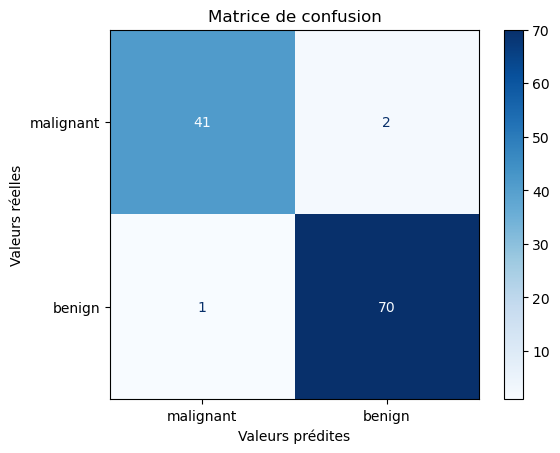

In [31]:
# Matrice de confusion
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=data.target_names)
cm_disp.plot(cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')

Text(0, 0.5, 'Valeurs réelles')

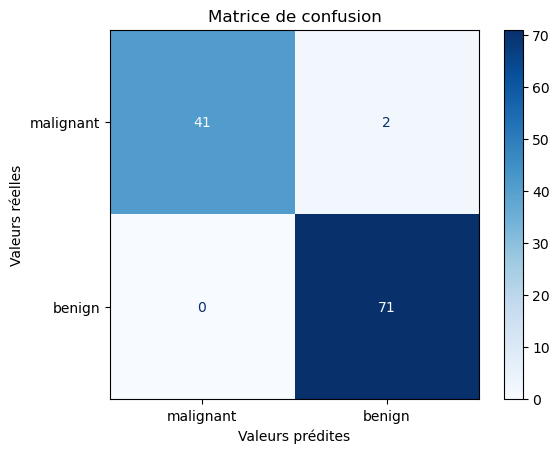

In [32]:
# Matrice de confusion
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_disp_2 = ConfusionMatrixDisplay(cm_2, display_labels=data.target_names)
cm_disp_2.plot(cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')

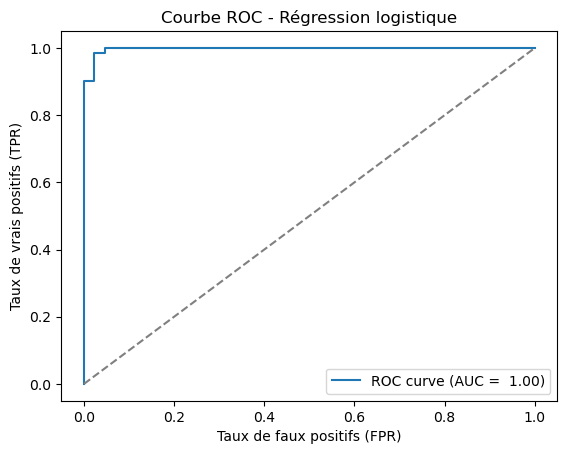

In [24]:
# Courbe ROC et AUC
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = model.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc= roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc : .2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Régression logistique')
plt.legend()

In [35]:
y_pred_proba_2 = model_2.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_2)
auc= roc_auc_score(y_test, y_pred_proba_2)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc : .2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - SVM')
plt.legend()

AttributeError: This 'GridSearchCV' has no attribute 'predict_proba'

In [25]:
# Rapport de classification
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

